**Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [2]:
#loading dataset
df=pd.read_csv("loan_approval_dataset.csv")
df.drop(["loan_id"],axis=1,inplace=True)

**Data Preprocessing**

In [3]:
# understanding dataset and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [4]:
# removing extra space before the name of each column
df.columns=df.columns.str.strip()

In [5]:
# creating new DataFrame to convert categorical values to numeric values
new_df=df.copy()

In [6]:
new_df["isGraduate"]=new_df.education
new_df.isGraduate=new_df.isGraduate.str.replace("Not Graduate","0")
new_df.isGraduate=new_df.isGraduate.str.replace("Graduate","1")
new_df.isGraduate=pd.to_numeric(new_df.isGraduate,downcast="integer")

In [7]:
new_df["isSelfEmployed"]=new_df.self_employed
new_df.isSelfEmployed=new_df.isSelfEmployed.str.replace("No","0")
new_df.isSelfEmployed=new_df.isSelfEmployed.str.replace("Yes","1")
new_df.isSelfEmployed=pd.to_numeric(new_df.isSelfEmployed,downcast="integer")

In [8]:
new_df["is_loan_status"]=new_df.loan_status
new_df.is_loan_status=new_df.is_loan_status.str.replace("Rejected","0")
new_df.is_loan_status=new_df.is_loan_status.str.replace("Approved","1")
new_df.is_loan_status=pd.to_numeric(new_df.is_loan_status,downcast="integer")

In [9]:
# remove columns with categorical values from new dataframe
new_df.drop(["education","self_employed","loan_status"],axis=1,inplace=True)
new_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,isGraduate,isSelfEmployed,is_loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [10]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Analysis**

Text(158.08159722222223, 0.5, 'Features')

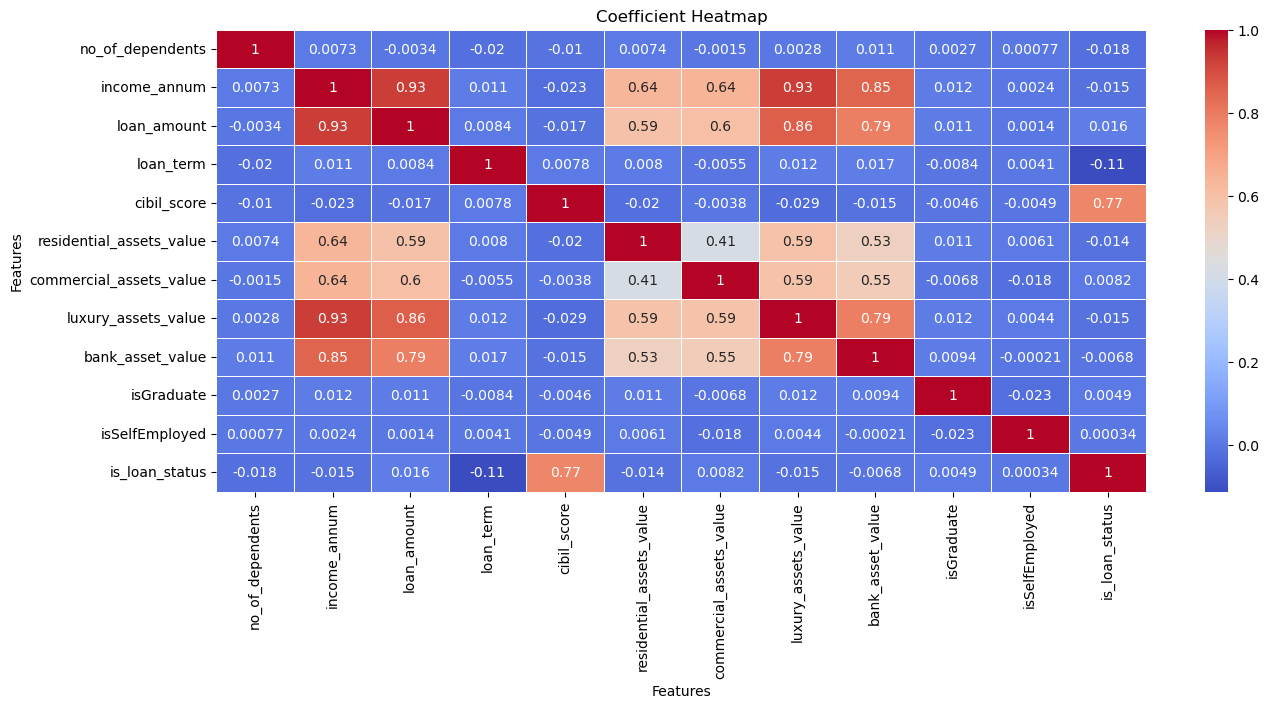

In [11]:
#heatmap to visualize and quantify relationships between variables effectively.
plt.figure(figsize=(15, 6))
sns.heatmap(new_df.corr(), annot=True, linewidth=0.5,cmap='coolwarm')
plt.title('Coefficient Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

The coefficients of "commercial_assets_value" , "bank_asset_value", "isGraduate" , "isSelfEmployed" are very low as compared to other features. So, we should drop them in order to simplify the model and potentially improve its performance. 

In [12]:
#drop unnecessary columns from dataframe 
new_df.drop(["commercial_assets_value","bank_asset_value","isGraduate","isSelfEmployed"],axis=1,inplace=True)

In [13]:
#drop unnecessary columns from dataframe 
df.drop(["commercial_assets_value","bank_asset_value","education","self_employed"],axis=1,inplace=True)

In [14]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,loan_status
0,2,9600000,29900000,12,778,2400000,22700000,Approved
1,0,4100000,12200000,8,417,2700000,8800000,Rejected
2,3,9100000,29700000,20,506,7100000,33300000,Rejected
3,3,8200000,30700000,8,467,18200000,23300000,Rejected
4,5,9800000,24200000,20,382,12400000,29400000,Rejected


In [15]:
new_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,is_loan_status
0,2,9600000,29900000,12,778,2400000,22700000,1
1,0,4100000,12200000,8,417,2700000,8800000,0
2,3,9100000,29700000,20,506,7100000,33300000,0
3,3,8200000,30700000,8,467,18200000,23300000,0
4,5,9800000,24200000,20,382,12400000,29400000,0


In [16]:
# convert categorical value to numeric for data modelling
loan_status=pd.get_dummies(df["loan_status"],drop_first=True)
df.drop(["loan_status"],axis=1,inplace=True)
df=pd.concat([df,loan_status],axis=1)
df.columns=df.columns.str.strip()

In [17]:
df.Rejected=df.Rejected.astype(int)
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,Rejected
0,2,9600000,29900000,12,778,2400000,22700000,0
1,0,4100000,12200000,8,417,2700000,8800000,1
2,3,9100000,29700000,20,506,7100000,33300000,1
3,3,8200000,30700000,8,467,18200000,23300000,1
4,5,9800000,24200000,20,382,12400000,29400000,1


**Modelling**

In [19]:
#import library
from sklearn.model_selection import GridSearchCV, train_test_split

In [20]:
#splitting into train and test data from data frame
X=df.drop(["Rejected"],axis=1)
Y=df.Rejected

In [21]:
#splitting train and test data into x and y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [22]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [23]:
#initialize a Decision Tree model
dt_model=DecisionTreeClassifier()

In [24]:
#fit the model on the training data
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [25]:
#predictions by the model on the training data
Y_pred=dt_model.predict(X_test)

In [26]:
#import library
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
#analyze classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       678
           1       0.98      0.97      0.98       390

    accuracy                           0.99      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.99      0.99      0.99      1068



In [28]:
#analyze confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[672,   6],
       [ 10, 380]], dtype=int64)

In [29]:
#import library
from sklearn.model_selection import cross_val_score

In [30]:
#performance of model
accuracies=cross_val_score(estimator=dt_model,X=X_train,y=Y_train,cv=10)

In [31]:
accuracies.mean()

0.9793798676012463

***Accuracy : 0.9793798676012463***

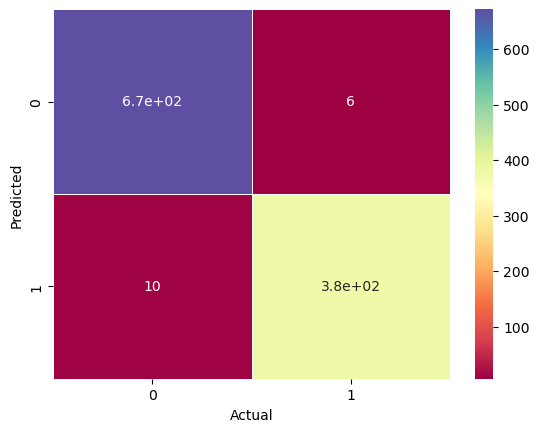

In [67]:
#visulaize confusion matrix
cnf_matrix=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap="Spectral",linewidth=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


***- True Negatives (TN): 672 cases where the model correctly predicted that the loan application was not eligible.***

***- False Positives (FP): 6 cases where the model incorrectly predicted that the loan application was eligible when it was not.***

***- False Negatives (FN): 10 cases where the model incorrectly predicted that the loan application was not eligible when it was.***

***- True Positives (TP): 380 cases where the model correctly predicted the loan application's eligibility.***


In [73]:
#import library
from sklearn import tree

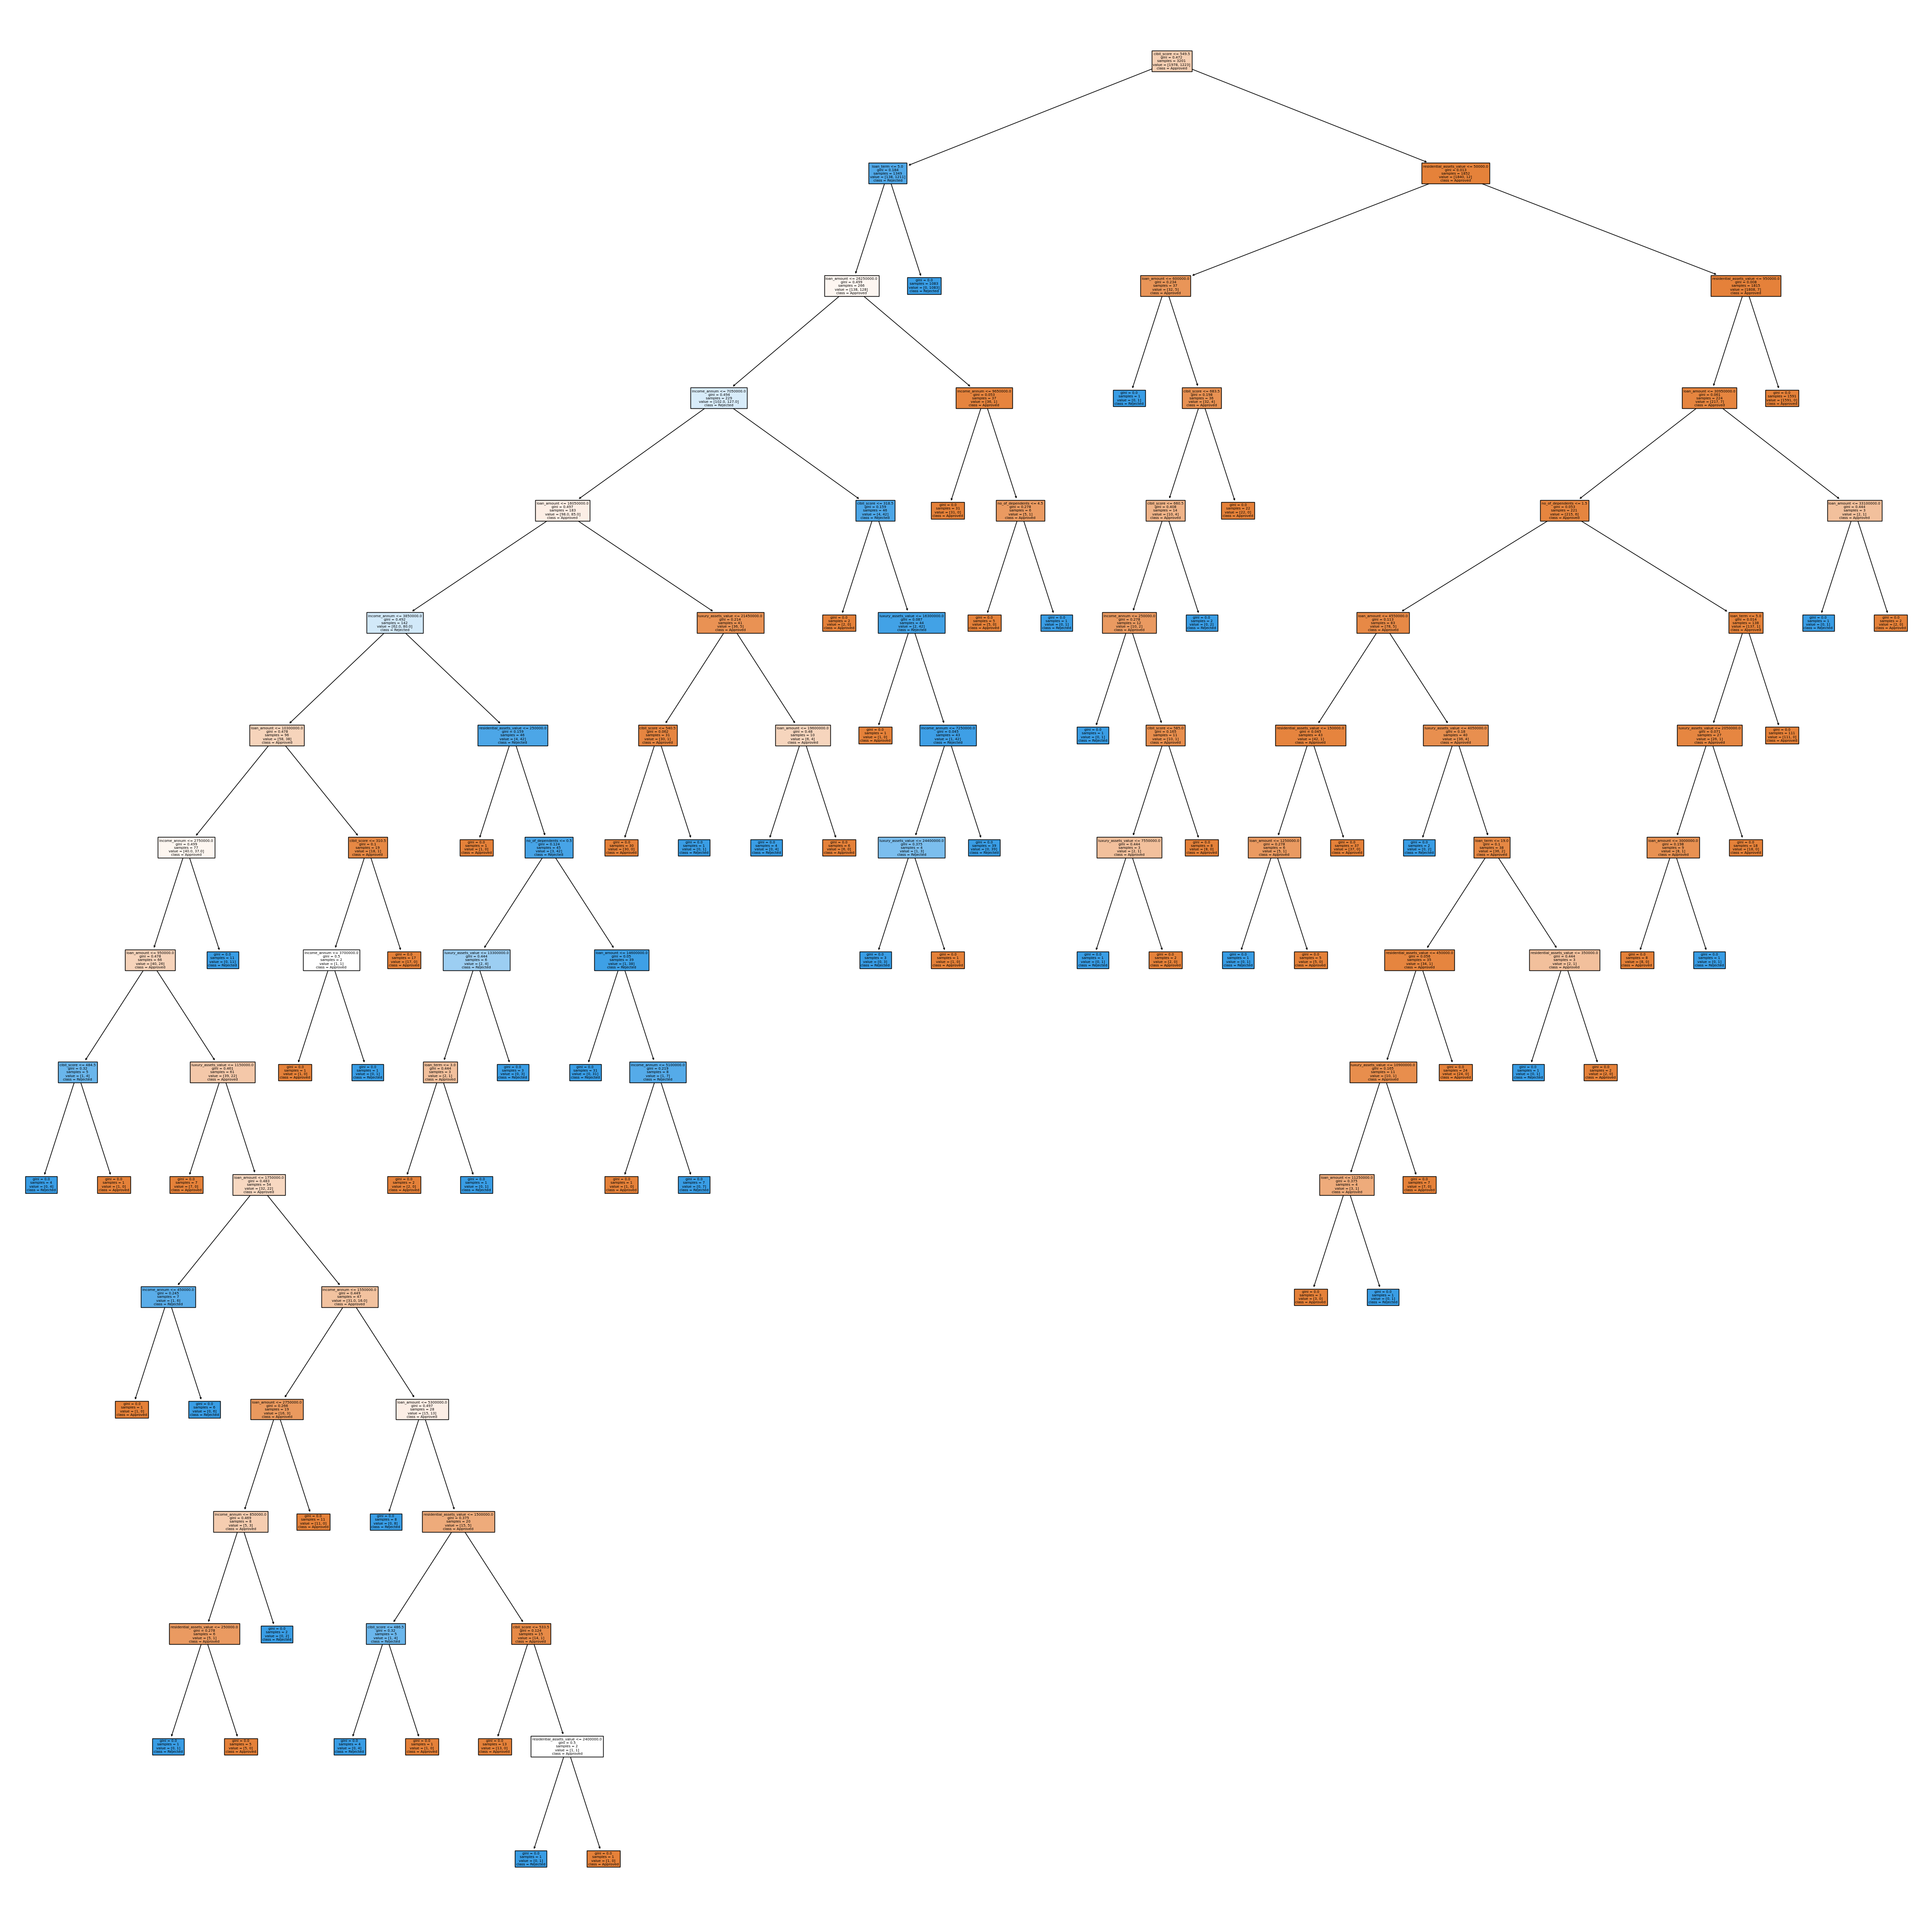

In [86]:
#visualize decision tree
plt.figure(figsize=(50,50))
tree2=tree.plot_tree(dt_model,filled=True,feature_names=df.columns,class_names=["Approved","Rejected"])